## 모듈 import

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = None

## 데이터셋 로드

In [18]:
dataset = sns.load_dataset('titanic')

display(dataset.shape)
dataset.head()

(891, 15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 학습데이터 정의

In [19]:
data = dataset.copy()

In [54]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [20]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [23]:
features = [
#     'survived',  ## target
    'pclass', 
    'sex', 
    'age', 
    'sibsp', 
    'parch', 
    'fare',
    'embarked', 
    'class', 
    'who', 
    'adult_male', 
    'deck', 
    'embark_town',
    'alive', 
    'alone'] 
target = 'survived'

In [24]:
x = data[features]
y = data[target]
     
xy = pd.concat([x, y], axis=1)

display(xy.shape)
xy.head()

(891, 15)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


## 학습 및 예측

In [25]:
from pycaret.classification import *  # 분류
# from pycaret.regression import *      # 회귀
# from pycaret.clustering import *      # 군집
# from pycaret.anomaly import *         # 이상 탐지
# from pycaret.arules import *          # 연관 규칙

In [26]:
clf = setup(data=xy, 
            target=target, 
            session_id=123) 

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 15)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [28]:
# ensembled_models = ensemble_model(dt)

In [36]:
# predict_model(data=dataset, estimator=ensembled_models)
prediction = predict_model(data=xy, estimator=dt)
prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,Label,Score
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0,1.0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1,1.0
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,1,1.0
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1,1.0
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,0,1.0
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1,1.0
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0,0,1.0
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,1,1.0


0    549
1    342
Name: survived, dtype: int64

0    549
1    342
Name: Label, dtype: int64

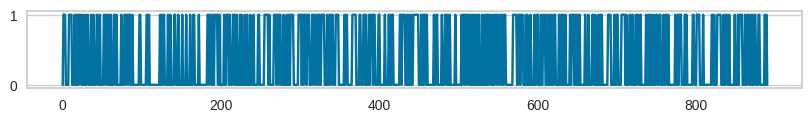

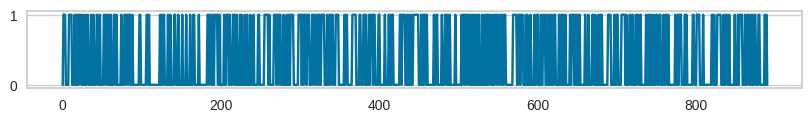

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,1))
prediction['survived'].plot()
display(prediction['survived'].value_counts())

plt.figure(figsize=(10,1))
prediction['Label'].plot()
display(prediction['Label'].value_counts())

## 모델 분석

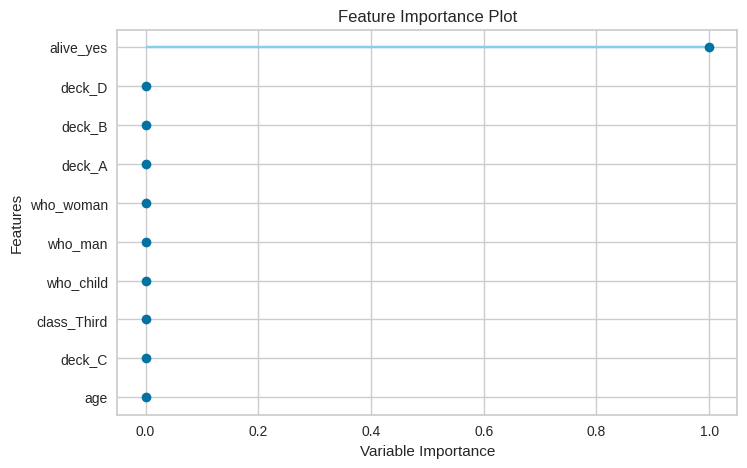

In [38]:
plot_model(dt, plot='feature')

In [39]:
# plot_model(dt, plot='confusion_matrix')

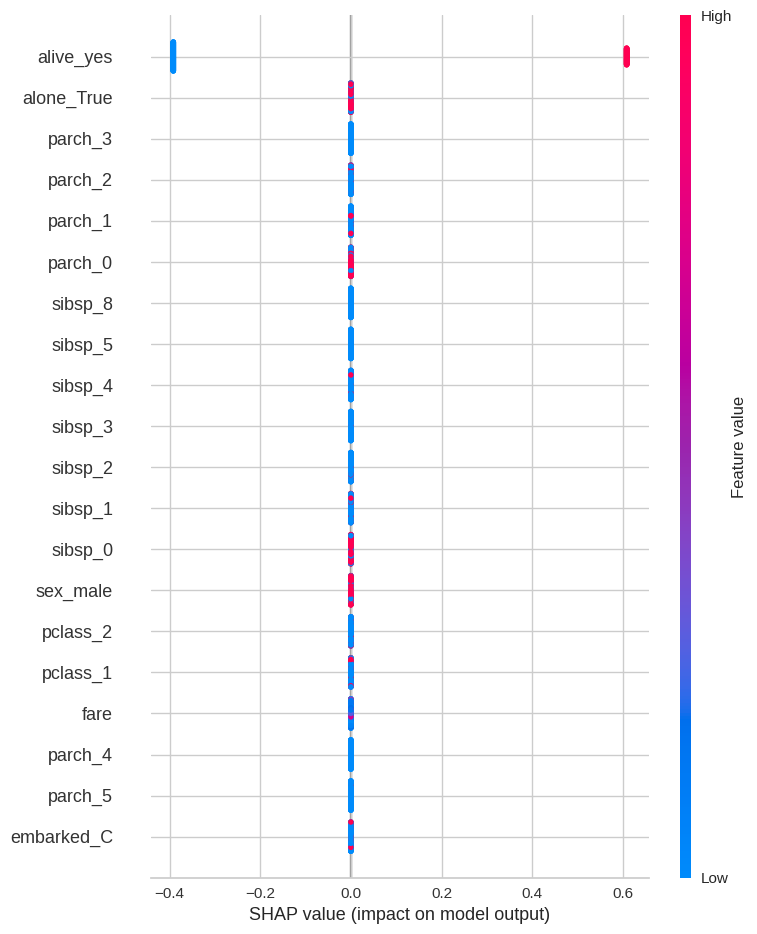

In [40]:
interpret_model(dt)

In [41]:
# interpret_model(dt, plot='reason')

## 모든 모델 학습

In [ ]:
best_model = compare_models(sort='Accuracy', n_select=3, fold=5)
print(best_model)

In [ ]:
blended_models = blend_models(best_models, fold=5)